<a href="https://colab.research.google.com/github/eduardodut/Mineracao_dados_textos_web/blob/master/projeto01_equipe01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> EQUIPE: </b>
  - Eduardo Façanha
  - Giovanni Brígido
  - Maurício Brito

<b> ATIVIDADE 01 </b> - Pré-processamento dos textos (Prazo: 11/05/2020 - 30%)

- Tokenização
- Lematização
- POS Tagging
- Normalização (hashtags, menções, emojis e símbolos especiais)
- Chunking
- NER (entidades nomeadas)
- Remoção stop-words

<b> ATIVIDADE 02 </b> - Representação Semântica (Prazo: 30/06/2020 - 30%)

- Uso de bases de conhecimento externas
- Identificação de tópicos
- Representação vetorial das palavras e textos

<b> ATIVIDADE 03 </b> - Analise da Linguagem Ofensiva - Subtarefas A e B (Prazo: 30/07/2020 - 40%)

- Resultado da subtarefa A para um conjunto de teste a ser fornecido
- Resultado da subtarefa B para um conjunto de teste a ser fornecido


# Atividade 03

## Bibliotecas utilizadas

Tecnologias utilizadas
figura do scikit learn
spacy
nltk


In [ ]:
import spacy
import pandas as pd
import re
!pip install Transformers
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
import en_core_web_lg
import en_core_web_md
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw
!pip install spacy-wordnet
!pip install empath
from empath import Empath 

## Engenharia de features

### Carregamento do arquivo de dados e transformação em DataFrame

É realizado o download do arquivo e instanciado um DataFrame com os dados. A variável do DataFrame é chamada 'tweets'

#### Dataset_treino

In [23]:
#download do repositório
def download_repositorio():
  %rm -rf /content/Mineracao_dados_textos_web
  !git clone https://github.com/eduardodut/Mineracao_dados_textos_web.git

download_repositorio()

Cloning into 'Mineracao_dados_textos_web'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 183 (delta 5), reused 4 (delta 1), pack-reused 171
Receiving objects: 100% (183/183), 108.44 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (115/115), done.
Checking out files: 100% (24/24), done.


In [ ]:
#download o arquivo localizado no reposítório do projeto


#leitura para objeto dataframe
tweets = pd.read_csv('/content/Mineracao_dados_textos_web/datasets/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())


#visualização dos primeiros registros
tweets.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1915k  100 1915k    0     0  7122k      0 --:--:-- --:--:-- --:--:-- 7122k
TWEETS DUPLICADOS:  0


,tweet,subtask_a,subtask_b,subtask_c
id,,,,
86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [ ]:
#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())

TWEETS DUPLICADOS:  0


#### testset_a

In [ ]:
#leitura para objeto dataframe
testset_a = pd.read_csv('/content/Mineracao_dados_textos_web/datasets/testset-levela.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#conversão da coluna 'id' de inteiro para string
# testset_a['id'] = testset_a['id'].astype('str')
#verificação e remoção de duplicatas
# print(testset_a.duplicated(['tweet']).sum())
# if testset_a.duplicated(['tweet']).sum()>0:
#   testset_a.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_a.duplicated(['tweet']).sum())
# testset_a = testset_a[['subtask_c','subtask_b','subtask_a','id','tweet']]
testset_a.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  130k  100  130k    0     0   509k      0 --:--:-- --:--:-- --:--:--  509k


,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
27014,"#ConstitutionDay is revered by Conservatives, ..."
30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
13876,#Watching #Boomer getting the news that she is...
60133,#NoPasaran: Unity demo to oppose the far-right...


#### testset_b

In [24]:

#leitura para objeto dataframe
testset_b = pd.read_csv('/content/Mineracao_dados_textos_web/datasets/testset-levelb.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')
# print(testset_b.duplicated(['tweet']).sum())
# if testset_b.duplicated(['tweet']).sum()>0:
#   testset_b.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_b.duplicated(['tweet']).sum())
testset_b.head()

,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
60133,#NoPasaran: Unity demo to oppose the far-right...
83681,. . . What the fuck did he do this time?
65507,@USER Do you get the feeling he is kissing @US...
12588,@USER Nigga ware da hits at


### Funções para extração de features e preprocessamento

#### Funções para criação de features

Criação de features com informações intrínsecas ao corpus

##### Comprimento do tweet % (contagem de caracteres/comprimento máximo de um tweet)

In [ ]:
def get_tweet_length(text):
    return len(text)/240.0
tweets.tweet.apply(get_tweet_length).head()

id
86426    0.295833
90194    0.279167
16820    0.758333
62688    0.270833
43605    0.300000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['comprimento_tweet'] = tweets.tweet.apply(get_tweet_length)
tweets.hist(column = 'comprimento_tweet', by= "subtask_a")
tweets.hist(column = 'comprimento_tweet', by= "subtask_b")

##### Contagem de tokens

In [ ]:
def get_word_count(text):
  return len(text.split())

tweets.tweet.apply(get_word_count).head()

id
86426    14
90194    11
16820    27
62688    11
43605    12
Name: tweet, dtype: int64

###### Histogramas


In [ ]:
tweets['contagem_palavras'] = tweets.tweet.apply(get_word_count)
tweets.hist(column = 'contagem_palavras', by= "subtask_a")
tweets.hist(column = 'contagem_palavras', by= "subtask_b")

##### Cálculo do comprimento médio das palavras

In [ ]:
def get_avg_word_len(text):
  words = text.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

tweets.tweet.apply(get_avg_word_len).head()

id
86426    4.142857
90194    5.181818
16820    5.777778
62688    5.000000
43605    5.083333
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['avg_len'] = tweets.tweet.apply(get_avg_word_len)
tweets.hist(column = 'avg_len', by= "subtask_a")
tweets.hist(column = 'avg_len', by= "subtask_b")

##### Contagem de stop words

In [ ]:
def get_stop_words_percent(text):
  return len([t for t in text.split() if t in STOP_WORDS])/len(text.split())


tweets.tweet.apply(get_stop_words_percent).head()

id
86426    0.571429
90194    0.000000
16820    0.296296
62688    0.363636
43605    0.250000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['sw_count'] = tweets.tweet.apply(get_stop_words_percent)
tweets.hist(column = 'sw_count', by= "subtask_a")
tweets.hist(column = 'sw_count', by= "subtask_b")

##### Percentual de #hashtags

In [ ]:
def get_hashtag_percent(text):
  return len([t for t in text.split() if t.startswith("#")])/len(text.split())

tweets.tweet.apply(get_hashtag_percent).head()

id
86426    0.000000
90194    0.181818
16820    0.185185
62688    0.000000
43605    0.000000
Name: tweet, dtype: float64

###### Histogramas

In [ ]:
tweets['hashtag_count'] = tweets.tweet.apply(get_hashtag_percent)
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_a")
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_b")

##### Contagem de @menções

In [ ]:
def get_mention_percent(text):
  return len([t for t in text.split() if t.startswith("@")])/len(text.split())

tweets.tweet.apply(get_mention_percent).head()

id
86426    0.071429
90194    0.272727
16820    0.000000
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['mention_count'] = tweets.tweet.apply(get_mention_percent)
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_a")
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_b")

##### Contagem de palavras em MAIÚSCULO

In [ ]:
def get_uppercase_percent(text):
  return len([t for t in text.split() if t.isupper()])/len(text.split())

tweets.tweet.apply(get_uppercase_percent).head()

id
86426    0.071429
90194    0.454545
16820    0.185185
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['upper_count'] = tweets.tweet.apply(get_uppercase_percent)
tweets.hist(column = 'upper_count', by= "subtask_a")
tweets.hist(column = 'upper_count', by= "subtask_b")

##### Verificar se o tweet contém URL

In [ ]:
def get_contain_url(text):

  return int('URL' in text )

tweets.tweet.apply(get_contain_url).head()

id
86426    0
90194    1
16820    1
62688    0
43605    0
Name: tweet, dtype: int64

##### Contagem de sentenças

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def sent_count(text):
  return len(sent_tokenize(text))
tweets.tweet.apply(sent_count).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


id
86426    1
90194    2
16820    2
62688    2
43605    1
Name: tweet, dtype: int64

###### Histogramas

In [ ]:
tweets['sent_count'] = tweets.tweet.apply(sent_count)
tweets.hist(column = 'sent_count', by= "subtask_a")
tweets.hist(column = 'sent_count', by= "subtask_b")

##### Funções de preprocessamento e Limpeza


In [ ]:
#Tratamento básico
def tratamento_texto(text):
  text = text.lower()
  text = text.strip()
  #remove as menções a usuários de cada text
  #remove as palavras url
  text = re.sub('url$', '', text, flags=re.MULTILINE)
  text = re.sub(r'^n$', 'and', text, flags=re.MULTILINE)
  text = re.sub(r'^u$', 'you', text, flags=re.MULTILINE)
  text = re.sub(r'^r$', 'are', text, flags=re.MULTILINE)
  text = re.sub(r'^sh*t$', 'shit', text, flags=re.MULTILINE)
  text = re.sub(r'&amp;', '', text, flags=re.MULTILINE)
  
  doc = nlp(text)
  tokens = []
  for token in doc:
      if token.lemma_ != "-PRON-" :
        if not token.is_stop:
          if not token.is_punct :
            tokens.append(token.lemma_)
  
  text =  " ".join([token for token in tokens]).strip()  

  
  return text

#### Criação das features intrínsecas e preprocessamento 

In [ ]:
#@title Execução das funções de criação de features { display-mode: "form" }
from sklearn.base import BaseEstimator, TransformerMixin
from google.colab import files
class Criar_Features(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        

        return self
    def transform(self, X):

        features = pd.DataFrame(X)
        #Comprimento do tweet/240.0
        features['length'] = features['tweet'].apply(get_tweet_length)
        #Hashtag por tweet (%)
        features['hashtag_%'] = features['tweet'].apply(get_hashtag_percent)
        #Menções por tweet (%)
        features['mentions_%'] = features['tweet'].apply(get_mention_percent)
        #Stop words (%)
        features['stop_words_%'] = features['tweet'].apply(get_stop_words_percent)
        #upper case (%)
        features['uppercase_%'] =  features['tweet'].apply(get_uppercase_percent)
        #contagem de sentenças
        features['sent_count'] = features['tweet'].apply(sent_count)
        #contém url
        features['has_url'] = features['tweet'].apply(get_contain_url)
        
        features['tweet'] = features['tweet'].apply(tratamento_texto)
               

        return features

# criar_features = Criar_Features()
# print(criar_features.fit_transform(tweets.tweet))

criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}

if criar_trainset:
  trainset_aumentado = Criar_Features().fit_transform(tweets)
  trainset_aumentado.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/trainset_aumentado.txt', sep=' ')
  if 'COLAB_GPU' in os.environ:
    files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/trainset_aumentado.txt')
if criar_testset_a:
  testset_a_aumentado = Criar_Features().fit_transform(testset_a)
  testset_a_aumentado.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/testset_a_aumentado.txt', sep=' ')
  if 'COLAB_GPU' in os.environ:
    files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/testset_a_aumentado.txt')

if criar_testset_b:
  testset_b_aumentado = Criar_Features().fit_transform(testset_b) 
  testset_b_aumentado.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/testset_b_aumentado.txt', sep=' ')
  if 'COLAB_GPU' in os.environ:
    files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/testset_b_aumentado.txt')



In [ ]:
trainset_aumentado.head()

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url
id,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0
16820,amazon investigate chinese employee sell inter...,NOT,NaN,NaN,0.554167,0.0,0.000000,0.0,0.0,1,0
62688,@user should'vetaken piece shit volcano 😂,OFF,UNT,NaN,0.170833,0.0,0.166667,0.0,0.0,1,0
43605,@user @user obama want liberal illegal red ...,NOT,NaN,NaN,0.208333,0.0,0.250000,0.0,0.0,1,0


#### Features a partir de bases de conhecimento externas

##### Listagem dos tipos de entidades

In [ ]:
def extract_entities(text):
  doc = nlp(text)
  lista_entities = ""
  if len(doc.ents) > 0:
    for token in doc:
      if len(token.ent_type_) > 0:
        lista_entities = lista_entities  + " " + token.ent_type_
  
  return lista_entities




##### Classificar de sentimento positivo ou negativo

In [ ]:
def classificar_positivo_negativo(text):

    doc = nlp(text)

    return doc.cats


##### Vetores GloVe

In [ ]:
def get_embeddings(text):
  
  doc = nlp(text)
  return doc.vector


##### Empath

In [ ]:
from empath import Empath
lexicon = Empath()


#### Criação das features a partir das bases externas

In [ ]:
#@title Pesquisa em bases externas { display-mode: "form" }
criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}

from google.colab import files
vetores_trainset = pd.DataFrame()
vetores_testset_a = pd.DataFrame()
vetores_testset_b = pd.DataFrame()
def buscar_vetores(dataset_aumentado):
  
  #Extrai entidades
  entidades = dataset_aumentado['tweet'].apply(extract_entities)
  
  
  
  #classifica como positivo ou negativo
  pos_neg = dataset_aumentado['tweet'].apply(classificar_positivo_negativo).apply(pd.Series)
  #busca vetores glove          
  vetor_glove = dataset_aumentado['tweet'].apply(get_embeddings).apply(pd.Series)
  
  #empath
  emp = dataset_aumentado['tweet'].apply(lexicon.analyze).apply(pd.Series)
  print(emp)
  df = pd.concat([entidades, pos_neg, vetor_glove, emp],axis = 1)
      
  return df

for tamanho in ["pequeno", "medio", "grande"]:
  
  if tamanho == "grande":
    nlp = en_core_web_lg.load()

  if tamanho == "medio":
    nlp = en_core_web_md.load()

  if tamanho == "pequeno":
    nlp = en_core_web_sm.load()

  textcat = nlp.create_pipe("textcat")
  textcat.add_label("POSITIVE")
  textcat.add_label("NEGATIVE")
  
  nlp.add_pipe(textcat, last=True)
  
  nlp.begin_training()

  if criar_trainset:
    vetores_trainset = buscar_vetores(trainset_aumentado)
    vetores_trainset['entities'] = vetores_trainset['tweet']
    vetores_trainset.drop("tweet", inplace= True, axis=1)

    vetores_trainset.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_trainset_aumentado_'+ tamanho + '.txt', sep=' ')
    if 'COLAB_GPU' in os.environ:
      files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_trainset_aumentado_'+ tamanho + '.txt')

  if criar_testset_a:
    vetores_testset_a = buscar_vetores(testset_a_aumentado)
    vetores_testset_a['entities'] = vetores_testset_a['tweet']
    vetores_testset_a.drop("tweet", inplace= True, axis=1)
    vetores_testset_a.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_testset_a_aumentado_'+ tamanho + '.txt', sep=' ')
    if 'COLAB_GPU' in os.environ:
      files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_testset_a_aumentado_'+ tamanho + '.txt')


  if criar_testset_b:
    vetores_testset_b = buscar_vetores(testset_b_aumentado)
    vetores_testset_b['entities'] = vetores_testset_b['tweet']
    vetores_testset_b.drop("tweet", inplace= True, axis=1)
    vetores_testset_b.to_csv('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_testset_b_aumentado_'+ tamanho + '.txt', sep=' ')
    if 'COLAB_GPU' in os.environ:
      files.download('/content/Mineracao_dados_textos_web/datasets/datasets_aumentados/vetores_testset_b_aumentado_'+ tamanho + '.txt')
  
  nlp.remove_pipe('textcat')

In [ ]:
vetores_testset_a_aumentado_grande.head()

,POSITIVE,NEGATIVE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,entities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15923,0.995029,0.005570,-0.191585,-0.046306,0.161409,0.076512,0.009744,-0.155384,0.020297,-0.031936,0.027255,1.090883,-0.058534,-0.073163,0.137335,0.098073,-0.151118,0.068070,-0.056376,-0.030498,0.112310,0.186221,0.057128,-0.081190,0.137852,-0.049840,0.039185,-0.086562,-0.070903,0.098239,-0.023760,0.200604,0.061349,0.100631,0.078179,-0.045438,0.088721,-0.000801,-0.163650,-0.110346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ORG GPE NORP PERSON PERSON PERSON
27014,0.509064,0.131664,-0.079798,-0.081745,-0.015741,-0.010352,0.027770,0.021988,0.042276,0.157502,0.131809,1.886706,-0.135542,-0.008212,-0.074740,0.082310,-0.115669,0.154069,-0.145469,0.252092,-0.137063,0.266558,0.161167,-0.129297,0.213116,-0.210784,0.034232,-0.020127,-0.300672,0.088087,0.146497,0.136266,0.096604,0.554111,0.077092,-0.162292,0.132814,0.017613,-0.155986,-0.073968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PERSON NORP
30530,0.774465,0.058924,0.035193,0.062931,-0.067490,0.107373,0.146218,-0.167144,0.150658,-0.072166,-0.146755,-0.349239,0.093739,-0.351798,0.020655,0.035068,0.090187,0.149613,-0.166578,-0.524152,0.082028,0.175355,0.019184,0.384594,0.230083,-0.246258,-0.099124,0.106663,0.113336,0.039243,0.197662,-0.029539,0.092307,0.229685,0.231176,0.056841,-0.447688,0.135885,0.285860,0.114074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ORG ORG ORG PRODUCT PRODUCT ORG ORG ORG ORG ORG
13876,0.899354,0.052284,-0.062807,0.197384,-0.154072,0.029531,0.142492,-0.199123,0.063476,-0.016527,0.192436,1.341525,-0.221205,-0.237401,0.079269,-0.073526,-0.160988,-0.046720,-0.016854,0.202983,0.072408,-0.101646,0.072943,0.012844,0.076777,-0.190078,-0.054338,0.143393,0.027233,-0.004049,0.102748,-0.033239,-0.126029,-0.044787,-0.029465,0.121276,-0.117031,-0.119704,0.121817,0.270194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PERSON
60133,0.989788,0.007730,-0.024621,-0.112409,0.078997,0.066770,0.202874,-0.087660,-0.010270,0.069021,-0.045096,1.150540,-0.079274,-0.031881,0.034931,0.077285,0.027456,0.080750,-0.035473,0.470752,-0.090268,0.032652,0.141750,0.033244,0.414056,-0.113171,-0.042909,0.103596,-0.026231,0.084489,0.085333,0.040449,0.052166,0.192204,0.001698,0.147964,0.090845,0.135134,-0.088275,-0.134746,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GPE


## Treinamento do modelo


### Carregamento dos dados salvos

In [26]:
#@title Download do repositório e leitura dos datasets aumentados e respectivos vetores { display-mode: "form" }
import pandas as pd
def download_repositorio():
  %rm -rf /content/Mineracao_dados_textos_web
  !git clone https://github.com/eduardodut/Mineracao_dados_textos_web.git

download_repositorio()
from sklearn.feature_extraction.text import TfidfVectorizer


pasta_raiz = ''
if 'COLAB_GPU' in os.environ:
  pasta_raiz +="/content"

pasta_raiz = pasta_raiz + "/Mineracao_dados_textos_web/datasets/datasets_aumentados"


trainset_aumentado = pd.read_csv(pasta_raiz+'/trainset_aumentado.txt', sep=' ', index_col='id')

testset_a_aumentado = pd.read_csv(pasta_raiz+'/testset_a_aumentado.txt', sep=' ', index_col='id')

testset_b_aumentado = pd.read_csv(pasta_raiz+'/testset_b_aumentado.txt', sep=' ', index_col='id')




vetores_trainset_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_grande.entities.fillna("",inplace=True)

vetores_trainset_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_medio.entities.fillna("",inplace=True)

vetores_trainset_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_pequeno.entities.fillna("",inplace=True)

dict_vetores = {'pequeno':[vetores_trainset_aumentado_pequeno, vetores_testset_a_aumentado_pequeno, vetores_testset_b_aumentado_pequeno],
                'medio':[vetores_trainset_aumentado_medio, vetores_testset_a_aumentado_medio, vetores_testset_b_aumentado_medio],
                'grande':[vetores_trainset_aumentado_grande, vetores_testset_a_aumentado_grande, vetores_testset_b_aumentado_grande]
}

VOCABULARIO_TWEETS = TfidfVectorizer().fit(pd.concat([testset_a_aumentado['tweet'], 
                                                      testset_b_aumentado['tweet'], 
                                                      trainset_aumentado['tweet']])).vocabulary_
VOCABULARIO_ENTIDADES = TfidfVectorizer().fit(pd.concat([vetores_testset_a_aumentado_grande['entities'], 
                                                         vetores_testset_b_aumentado_grande['entities'], 
                                                         vetores_trainset_aumentado_grande['entities']])).vocabulary_

Cloning into 'Mineracao_dados_textos_web'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 187 (delta 6), reused 7 (delta 1), pack-reused 171
Receiving objects: 100% (187/187), 166.57 MiB | 25.70 MiB/s, done.
Resolving deltas: 100% (116/116), done.
Checking out files: 100% (25/25), done.


### Otimização de hiperparâmetros

#### Pipeline

In [4]:
#@markdown Formato dos dados de entrada
trainset_aumentado.head(3)

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url
id,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0
16820,amazon investigate chinese employee sell inter...,NOT,NaN,NaN,0.554167,0.0,0.000000,0.0,0.0,1,0


##### Anexação dos dados da base de conhecimento externo

In [5]:
#@markdown - São anexados ao trainset_aumentado os dados pesquisados das bases externas

from sklearn.base import TransformerMixin, BaseEstimator
class Anexar_Bases_Externas(BaseEstimator, TransformerMixin):
    def __init__(self, tamanho = ""):
        self.tamanho = tamanho
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
      
      for vetor in dict_vetores[self.tamanho]:

        

        if X.index.isin(vetor.index).all():
          return X.join(vetor.loc[X.index.values])

#Parâmetros testados:
param_grid_anexar_bases_externas = {'anexar_bases_externas__tamanho': ['pequeno', 'medio', 'grande']}
  
Anexar_Bases_Externas('pequeno').fit_transform(trainset_aumentado).head(2)

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url,POSITIVE,NEGATIVE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,entities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0,0.038587,0.644985,-1.041346,-1.257343,-0.500457,0.408931,1.528452,2.627227,-0.565433,-0.308709,0.589683,-0.658479,2.245854,-1.227979,2.843073,-1.752706,-0.953441,-0.419641,-0.526252,1.516921,1.228042,-1.480825,-0.835894,0.10807,-0.590261,-0.683896,0.489676,-1.127765,0.075757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NORP
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0,0.122446,0.528339,0.696464,-0.722578,-0.737777,0.867711,1.398233,1.998041,0.266691,0.601211,1.760921,-0.005778,2.159467,-0.673866,-0.066159,-1.201520,-1.598888,-0.620495,-0.061755,1.140358,-1.041767,-0.863361,0.388487,-1.10223,-0.402286,-0.253979,-0.266001,0.045803,0.301236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DATE ORG


##### Tratamento das colunas

In [6]:
#@markdown - Transformação de features textuais em vetores via Tfidf e redução de dimensionalidade via TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import TruncatedSVD
!pip install empath
from empath import Empath 
from scipy.stats import randint
#Pipeline de tratamento de colunas
transformar_colunas = ColumnTransformer([('tweet',    Pipeline([('vetorizar',  TfidfVectorizer(vocabulary= VOCABULARIO_TWEETS, 
                                                                                               tokenizer = TweetTokenizer().tokenize)),
                                                                ('reduzir',    TruncatedSVD())]), 'tweet'),
                                         ('empath',   TruncatedSVD(),          list(Empath().cats.keys())),
                                         ('entities', Pipeline([('vetorizar',  TfidfVectorizer(vocabulary= VOCABULARIO_ENTIDADES)),
                                                                ('reduzir',    TruncatedSVD())]), 'entities')],
                                          remainder=  'passthrough') #colunas remanescentes

#Parâmetros de tratamento testados:

param_grid_transformar_colunas = {'transformar_colunas__tweet__vetorizar__ngram_range': [(1,1),(2,2),(1,2)],
                                  'transformar_colunas__tweet__vetorizar__tokenizer'  : [TweetTokenizer().tokenize],
                                  'transformar_colunas__tweet__vetorizar__use_idf'    : [True,False],
                                  'transformar_colunas__tweet__reduzir__n_components' : randint(10,1000),
                                  
                                  'transformar_colunas__empath__n_components'         : randint(10,80),
                                  
                                  'transformar_colunas__entities__vetorizar__use_idf' : [True,False],
                                  'transformar_colunas__entities__reduzir__n_components' : [2,5,10],
                            }



colunas_tratadas = pd.DataFrame(transformar_colunas.fit_transform(Anexar_Bases_Externas('pequeno').fit_transform(trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1))))
colunas_tratadas.head()

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57824 sha256=e2a6c8c028381b910cc6f9898fcd508b26acbb372a45129cee1c64e98e81b300
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,0.021295,0.018429,0.328386,-0.227229,0.041569,0.085055,0.108333,0.0,0.250000,0.0,0.0,1.0,0.0,0.038587,0.644985,-1.041346,-1.257343,-0.500457,0.408931,1.528452,2.627227,-0.565433,-0.308709,0.589683,-0.658479,2.245854,-1.227979,2.843073,-1.752706,-0.953441,-0.419641,-0.526252,1.516921,1.228042,-1.480825,-0.835894,0.108070,-0.590261,-0.683896,0.489676,...,0.013714,1.915758,-0.026623,-0.108559,1.840862,0.753077,0.596307,0.633468,0.802329,-0.620325,-1.157371,-0.202152,-1.665904,-0.488559,-0.325713,0.220623,-0.497717,0.560385,-1.142930,0.045411,0.094072,-0.561355,0.401169,0.100222,0.201138,0.318948,-0.533064,-1.886784,1.250545,1.990115,-0.318942,-0.590662,0.109791,-0.605047,-0.204225,-1.452996,0.377721,1.469993,-0.164934,0.290542
1,0.053246,0.133497,0.573822,-0.641764,0.454750,0.032912,0.212500,0.0,0.272727,0.0,0.0,1.0,0.0,0.122446,0.528339,0.696464,-0.722578,-0.737777,0.867711,1.398233,1.998041,0.266691,0.601211,1.760921,-0.005778,2.159467,-0.673866,-0.066159,-1.201520,-1.598888,-0.620495,-0.061755,1.140358,-1.041767,-0.863361,0.388487,-1.102230,-0.402286,-0.253979,-0.266001,...,0.440465,0.807061,0.833678,-0.318138,0.602203,0.814097,1.572616,-1.401342,1.077444,-0.400720,-0.274382,-0.583266,-0.767601,0.193581,0.492965,-0.717458,0.309168,0.958659,-0.427471,-0.633324,-0.079002,1.305284,0.274873,0.311162,1.892246,-1.055072,-0.233875,-0.246164,1.612857,1.078842,-0.976746,-1.042896,-0.119293,0.282059,0.715001,-0.866100,-0.560081,0.567642,0.426799,-0.281517
2,0.027547,0.061302,2.530290,0.423504,0.374324,0.082631,0.554167,0.0,0.000000,0.0,0.0,1.0,0.0,0.222222,0.721776,-0.615152,-0.853825,-2.274851,1.051427,-0.128762,2.064911,-0.950929,0.541458,1.183291,1.666126,1.882830,-1.186785,1.616406,-1.432544,-0.670968,0.114158,0.121697,1.425728,-0.778844,-1.237028,1.138319,-0.346268,-0.375115,-0.457941,-1.011506,...,1.411310,2.554292,-0.487833,-0.185452,1.637249,-0.446635,0.137360,0.493168,1.539407,-0.156815,1.137135,-2.009736,-0.017837,-0.019673,-0.658917,0.629225,0.237023,-0.335258,-1.475249,-1.144829,1.217227,-0.737502,-0.270369,1.223916,1.014272,-1.666876,-0.755022,-0.627115,1.445332,2.273419,0.189335,-1.557255,-0.763483,1.165960,0.795845,0.092238,0.022737,2.618931,1.011205,0.231510
3,0.015258,0.030778,0.065006,-0.103165,0.994964,-0.077238,0.170833,0.0,0.166667,0.0,0.0,1.0,0.0,0.043773,0.471979,0.394033,-0.402712,-1.691887,1.592296,-0.195483,1.436344,0.832459,1.509919,1.344776,1.392124,1.797900,-1.534125,0.583209,-1.500708,-0.337456,0.463184,-1.148427,-1.226802,0.262132,-0.654197,0.390067,0.794006,0.177037,0.268509,-0.695805,...,2.800806,0.175926,0.337968,0.085569,1.015790,1.052368,1.060033,-1.065626,0.441401,-1.990651,0.839566,-1.337828,-1.679889,0.043738,0.581153,-1.192460,1.246262,0.677392,-0.879031,0.709988,1.009378,1.531737,0.316778,0.677426,1.719754,-0.935622,-0.643598,0.052292,1.293263,0.438658,-1.427367,0.769587,-0.240995,0.393086,1.183709,-1.916518,-0.792273,0.660601,1.087136,-0.100614
4,0.096622,0.163589,0.840980,0.862720,0.994964,-0.077238,0.208333,0.0,0.250000,0.0,0.0,1.0,0.0,0.127577,0.534496,0.514337,-1.533549,-0.858121,0.899231,2.499733,0.871216,0.465504,0.934160,1.231368,-0.047256,2.483899,-0.284461,0.938099,-1.669887,-1.187995,0.173517,-0.623283,1.060048,-0.575847,-1.205700,0.868243,-0.366159,-0.615841,-0.485167,-0.417877,...,1.805321,0.937808,0.131991,-0.024218,2.396851,-0.712626,1.297234,-0.846530,1.546052,-0.524500,0.892556,-0.756907,-1.034634,0.109972,-0.161082,0.914799,0.547630,0.925543,-0.555662,-0.712496,-0.057928,0.841996,0.958830,1.723245,0.651187,-0.253526,-0.884392,-0.533880,0.855391,0.542294,-1.114131,-1.601093,0.265150,-0.044628,0.340354,-0.449549,0.144594,0.876419,-1.168657,0.201855


##### Redução de dimensionalidade

In [7]:
#@markdown - Os parâmetros serão ajustados para otimização do o f1score
from sklearn.decomposition import PCA
from scipy.stats import randint


#Parâmetros de redução de dimensionalidade testados:
param_grid_reducao_dimensionalidade = {'reducao_dimensionalidade__n_components' : randint(10,350),
                                       'reducao_dimensionalidade__whiten'      : [True,False],
                                       'reducao_dimensionalidade__svd_solver'   : ['auto']#, 'full', 'arpack', 'randomized']
                                       }



pd.DataFrame(PCA(n_components= 10, svd_solver='full').fit_transform(colunas_tratadas)).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.779798,2.521783,1.864221,-1.715945,-0.177686,-0.955675,-0.585428,3.548352,-1.151501,0.071565
1,0.917831,1.901273,-0.541206,0.945212,-1.959704,1.083174,0.748287,0.508026,-0.003992,-1.049036
2,-5.577118,0.004584,-0.308176,-0.432796,-0.283031,-0.802262,-1.741273,0.263512,0.793468,0.796742
3,1.074050,-1.626709,-0.344209,-0.585304,1.567258,2.366715,1.074294,0.363816,0.648282,-0.647102
4,1.133135,0.343388,0.480302,0.442223,-0.040028,0.403090,-1.158174,1.295215,-0.070839,-1.534445


##### Algoritmos de classificação


In [8]:
#@markdown - Logistic regression
#@markdown - K Neighbors
#@markdown - SVM
#@markdown - SGD classifier
#@markdown - Random Forest
#@markdown - Adaptative boosting
#@markdown - Extra trees
#@markdown - Gradient boosting
#@markdown - Extreme gradient boosting

import xgboost as xgb
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from nltk.tokenize import TweetTokenizer
from scipy.stats import randint

#Dicionário de algoritmos
dict_algoritmos = {'logistic_regression_1': LogisticRegression(),
                   'logistic_regression_2': LogisticRegression(),
                   'knn'                  : KNeighborsClassifier(), 
                   'svc'                  : SVC(),
                   'sgdc'                 : SGDClassifier(),
                   'random_forest'        : RandomForestClassifier(),
                   'ada_boost'            : AdaBoostClassifier(),
                   'extra_trees'          : ExtraTreesClassifier(),
                   'grad_boost'           : GradientBoostingClassifier(), 
                   'xgboost'              : xgb.XGBClassifier()}

#Hiperparâmetros testados
dict_param_grid_algoritmos = {'logistic_regression_1': {'classificador__penalty'        : ['l1'], 
                                                       'classificador__C'               : [100, 10, 1.0, 0.1, 0.01], 
                                                       'classificador__fit_intercept'   : [False, True], 
                                                       'classificador__solver'          : ['liblinear', 'saga'],
                                                       'classificador__n_jobs'          : [-1]},
                             'logistic_regression_2': {'classificador__penalty'         : ['l2'], 
                                                       'classificador__C'               : [100, 10, 1.0, 0.1, 0.01], 
                                                       'classificador__fit_intercept'   : [False, True], 
                                                       'classificador__solver'          : ['newton-cg', 'lbfgs', 'sag', 'saga'],
                                                       'classificador__n_jobs'          : [-1]},
                             'knn'                  : {}, 
                             'svc'                  : {'classificador__C'               : randint(1.0, 100.0),
                                                       'classificador__gamma'           : ['scale', 'auto'], 
                                                       'classificador__kernel'          : ['linear', 'poly', 'rbf']},
                             'sgdc'                 : {},
                             'random_forest'        : {'classificador__n_estimators'    : randint(100,1000), 
                                                       'classificador__max_depth'       : [None, 2, 3, 4, 5, 7, 10,100,200],
                                                       'classificador__min_samples_leaf': randint(1,4),
                                                       'classificador__bootstrap'       : [True,False],
                                                       'classificador__criterion'       : ['gini', 'entropy']},
                             'ada_boost'            : {},
                             'extra_trees'          : {},
                             'grad_boost'           : {}, 
                             'xgboost'              : {'classificador__learning_rate'   : [0.05, 0.10, 0.15, 0.2, 0.25, 0.3],
                                                       'classificador__max_depth'       : [3,4,5,6,8,10,12,15] ,
                                                       'classificador__min_child_weight': [1,3,5,7],
                                                       'classificador__gamma'           : [0.0,0.1,0.2,0.3,0.4],
                                                       'classificador__colsample_bytree': [0.3, 0.4, 0.5, 0.7]}}


param_grid_linear_svm = {'penalty' : ['l1','l2'] , 'loss' : ['hinge', 'squared_hinge'], 'C' : [0.01, 1, 10, 100], 'random_state' : [0, 42]}

param_grid_nb_multi = {'alpha' : [0.1, 1.0, 2] , 'fit_prior' : [False, True]}

param_grid_nb_gauss = {'var_smoothing' : [0.1, 1.0, 2]}

#### Subtask A

##### Modelo testado: Random Forest

###### Segregação de dados de treino e de teste

In [ ]:
#@markdown train_test_split
test_size = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
target = "subtask_a" #@param ["subtask_a", "subtask_b", "subtask_c"]
estratificar_alvo = True #@param {type:"boolean"}
remover_nan = True
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split

X = trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1)
if remover_nan:
  y = trainset_aumentado[target].dropna()
  X = X[trainset_aumentado[target] == trainset_aumentado[target]]
else:
  y = trainset_aumentado[target].fillna("NOT")
binarizador_label = LabelBinarizer()
y = binarizador_label.fit_transform(y)
stratify = None 
if estratificar_alvo == True:
  stratify = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify= stratify)

print("Quantidade de observações de teste: ", pd.Series(binarizador_label.inverse_transform(y_test)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_test)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_test)).count())
print('-------------')
print("Quantidade de observações de treino: ", pd.Series(binarizador_label.inverse_transform(y_train)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_train)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_train)).count())
y = pd.Series(np.ravel(y))
y_train = pd.Series(np.ravel(y_train))
y_test = pd.Series(np.ravel(y_test))

Quantidade de observações de teste:  2642
Percentual por categoria
NOT    66.72975
OFF    33.27025
dtype: float64
-------------
Quantidade de observações de treino:  10565
Percentual por categoria
NOT    66.748699
OFF    33.251301
dtype: float64


###### Otimização de hiperparâmetros


In [ ]:
#@markdown RandomSearchCV
algoritmo = "logistic_regression_1" #@param ['logistic_regression_1', 'logistic_regression_2', 'knn', 'svc', 'sgdc', 'random_forest', 'ada_boost', 'extra_trees', 'grad_boost', 'xgboost']
num_folds = 5 #@param {type:"integer"}

# busca_randomizada = True #@param {type:"boolean"}
num_inter =  1#@param {type:"integer"}
usar_todo_dataset = False #@param {type:"boolean"}
realizar_download = False #@param {type:"boolean"}
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
import pickle


param_grid = {**param_grid_anexar_bases_externas, 
              **param_grid_transformar_colunas, 
              **param_grid_reducao_dimensionalidade, 
              **dict_param_grid_algoritmos[algoritmo]}


canal_dados = Pipeline([("anexar_bases_externas",
                              Anexar_Bases_Externas()),
                        ('transformar_colunas',
                              transformar_colunas),
                        ('reducao_dimensionalidade',  
                              PCA()), 
                        ('classificador', 
                              dict_algoritmos[algoritmo])
    ])
cv = StratifiedKFold(n_splits= num_folds, shuffle= True)
args_random_search = {'estimator'          : canal_dados, 
                      'cv'                 : cv, 
                      'scoring'            :'f1_macro', 
                      'n_jobs'             : -1,
                      'verbose'            : 10,
                      'n_iter'             : num_inter,
                      'param_distributions': param_grid}

random_search = RandomizedSearchCV(**args_random_search) 

if usar_todo_dataset:
  random_search.fit(X, y)
else:
  random_search.fit(X_train,y_train)


#salvar modelo
import os, joblib

f1score = random_search.cv_results_['mean_test_score'][0]*100

nome_modelo = algoritmo +'_' + target +"_f1_"+str(int(f1score))
modelo_otimizado = random_search.best_estimator_
caminho = '/content/Mineracao_dados_textos_web/modelos_salvos/'
joblib.dump(modelo_otimizado, caminho + nome_modelo+'.joblib')
from google.colab import files
if 'COLAB_GPU' in os.environ and realizar_download:
  files.download(caminho + nome_modelo+'.joblib')
print("--"*20)
print("Melhores parâmetros encontrados: ")
print(random_search.best_params_)
print("--"*20)
print("Modelo salvo em: ")
print(caminho + nome_modelo+'.joblib')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   52.4s remaining:   34.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


----------------------------------------
Melhores parâmetros encontrados: 
----------------------------------------
Modelo salvo em: 
/content/Mineracao_dados_textos_web/modelos_salvos/logistic_regression_1_subtask_a_f1_60.joblib


###### Avaliação da busca de parâmetros

In [31]:
#@markdown Resultados da busca 
scores = random_search.cv_results_['mean_test_score']
scores_std = random_search.cv_results_['std_test_score']
print("Média do F1 score: ", round(scores[0],3),"+/-", round(scores_std[0],3))

print("Melhor F1 score: ", round(random_search.best_score_,3))

Média do F1 score:  0.6 +/- 0.01
Melhor F1 score:  0.6


              precision    recall  f1-score   support

         NOT       0.73      0.94      0.82      1763
         OFF       0.73      0.30      0.43       879

    accuracy                           0.73      2642
   macro avg       0.73      0.62      0.63      2642
weighted avg       0.73      0.73      0.69      2642



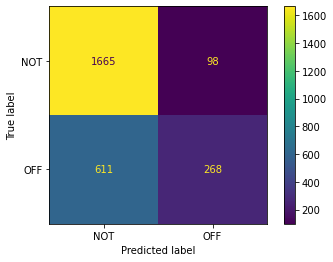

In [32]:
#@markdown Para dados de teste (X_test, y_test)
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = modelo_otimizado.predict(X_test)
print(classification_report(y_test, 
                            y_pred, 
                            target_names= 
                            binarizador_label.classes_))
plot_confusion_matrix(modelo_otimizado, 
                      X_test, 
                      y_test, 
                      display_labels= binarizador_label.classes_,
                      values_format= ".0f")
# )

              precision    recall  f1-score   support

         NOT       0.73      0.94      0.82      8815
         OFF       0.71      0.31      0.43      4392

    accuracy                           0.73     13207
   macro avg       0.72      0.62      0.63     13207
weighted avg       0.72      0.73      0.69     13207



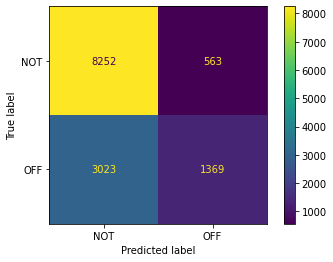

In [33]:
#@markdown Para todo os dados do trainset

from sklearn.metrics import classification_report, plot_confusion_matrix
y_pred = modelo_otimizado.predict(X)
print(classification_report(y, 
                            y_pred, 
                            target_names= 
                            binarizador_label.classes_))
plot_confusion_matrix(modelo_otimizado, 
                      X, 
                      y, 
                      display_labels= binarizador_label.classes_,
                      values_format= ".0f")

#### Subtask B

##### Modelo testado: Random Forest

###### Segregação de dados de treino e de teste

In [45]:
#@markdown train_test_split
test_size = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
target = "subtask_b" #@param ["subtask_a", "subtask_b", "subtask_c"]
estratificar_alvo = True #@param {type:"boolean"}
remover_nan = True
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split

X = trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1)
if remover_nan:
  y = trainset_aumentado[target].dropna()
  X = X[trainset_aumentado[target] == trainset_aumentado[target]]
else:
  y = trainset_aumentado[target].fillna("NOT")
binarizador_label = LabelBinarizer()
y = binarizador_label.fit_transform(y)
stratify = None 
if estratificar_alvo == True:
  stratify = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify= stratify)

print("Quantidade de observações de teste: ", pd.Series(binarizador_label.inverse_transform(y_test)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_test)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_test)).count())
print('-------------')
print("Quantidade de observações de treino: ", pd.Series(binarizador_label.inverse_transform(y_train)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_train)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_train)).count())
y = pd.Series(np.ravel(y))
y_train = pd.Series(np.ravel(y_train))
y_test = pd.Series(np.ravel(y_test))

Quantidade de observações de teste:  879
Percentual por categoria
TIN    88.054608
UNT    11.945392
dtype: float64
-------------
Quantidade de observações de treino:  3513
Percentual por categoria
TIN    88.101338
UNT    11.898662
dtype: float64


###### Otimização de hiperparâmetros


In [ ]:
#@markdown RandomSearchCV
algoritmo = "logistic_regression_1" #@param ['logistic_regression_1', 'logistic_regression_2', 'knn', 'svc', 'sgdc', 'random_forest', 'ada_boost', 'extra_trees', 'grad_boost', 'xgboost']
num_folds = 5 #@param {type:"integer"}

# busca_randomizada = True #@param {type:"boolean"}
num_inter =  1#@param {type:"integer"}
usar_todo_dataset = False #@param {type:"boolean"}
realizar_download = False #@param {type:"boolean"}
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
import pickle


param_grid = {**param_grid_anexar_bases_externas, 
              **param_grid_transformar_colunas, 
              **param_grid_reducao_dimensionalidade, 
              **dict_param_grid_algoritmos[algoritmo]}


canal_dados = Pipeline([("anexar_bases_externas",
                              Anexar_Bases_Externas()),
                        ('transformar_colunas',
                              transformar_colunas),
                        ('reducao_dimensionalidade',  
                              PCA()), 
                        ('classificador', 
                              dict_algoritmos[algoritmo])
    ])
cv = StratifiedKFold(n_splits= num_folds, shuffle= True)
args_random_search = {'estimator'          : canal_dados, 
                      'cv'                 : cv, 
                      'scoring'            :'f1_macro', 
                      'n_jobs'             : -1,
                      'verbose'            : 10,
                      'n_iter'             : num_inter,
                      'param_distributions': param_grid}

random_search = RandomizedSearchCV(**args_random_search) 

if usar_todo_dataset:
  random_search.fit(X, y)
else:
  random_search.fit(X_train,y_train)


#salvar modelo
import os, joblib

f1score = random_search.cv_results_['mean_test_score'][0]*100

nome_modelo = algoritmo +'_' + target +"_f1_"+str(int(f1score))
modelo_otimizado = random_search.best_estimator_
caminho = '/content/Mineracao_dados_textos_web/modelos_salvos/'
joblib.dump(modelo_otimizado, caminho + nome_modelo+'.joblib')
from google.colab import files
if 'COLAB_GPU' in os.environ and realizar_download:
  files.download(caminho + nome_modelo+'.joblib')
print("--"*20)
print("Melhores parâmetros encontrados: ")
print(random_search.best_params_)
print("--"*20)
print("Modelo salvo em: ")
print(caminho + nome_modelo+'.joblib')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   52.4s remaining:   34.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


----------------------------------------
Melhores parâmetros encontrados: 
----------------------------------------
Modelo salvo em: 
/content/Mineracao_dados_textos_web/modelos_salvos/logistic_regression_1_subtask_a_f1_60.joblib


###### Avaliação da busca de parâmetros

In [ ]:
#@markdown Resultados da busca 
scores = random_search.cv_results_['mean_test_score']
scores_std = random_search.cv_results_['std_test_score']
print("Média do F1 score: ", round(scores[0],3),"+/-", round(scores_std[0],3))

print("Melhor F1 score: ", round(random_search.best_score_,3))

Média do F1 score:  0.6 +/- 0.01
Melhor F1 score:  0.6


              precision    recall  f1-score   support

         NOT       0.73      0.94      0.82      1763
         OFF       0.73      0.30      0.43       879

    accuracy                           0.73      2642
   macro avg       0.73      0.62      0.63      2642
weighted avg       0.73      0.73      0.69      2642



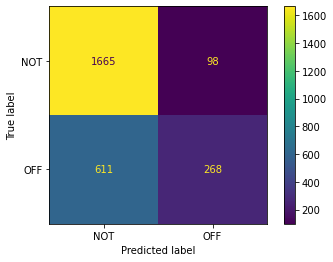

In [ ]:
#@markdown Para dados de teste (X_test, y_test)
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = modelo_otimizado.predict(X_test)
print(classification_report(y_test, 
                            y_pred, 
                            target_names= 
                            binarizador_label.classes_))
plot_confusion_matrix(modelo_otimizado, 
                      X_test, 
                      y_test, 
                      display_labels= binarizador_label.classes_,
                      values_format= ".0f")
# )

              precision    recall  f1-score   support

         NOT       0.73      0.94      0.82      8815
         OFF       0.71      0.31      0.43      4392

    accuracy                           0.73     13207
   macro avg       0.72      0.62      0.63     13207
weighted avg       0.72      0.73      0.69     13207



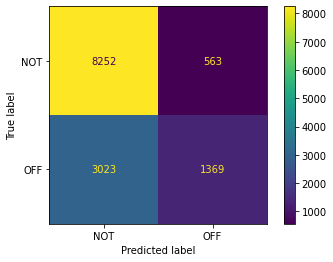

In [ ]:
#@markdown Para todo os dados do trainset

from sklearn.metrics import classification_report, plot_confusion_matrix
y_pred = modelo_otimizado.predict(X)
print(classification_report(y, 
                            y_pred, 
                            target_names= 
                            binarizador_label.classes_))
plot_confusion_matrix(modelo_otimizado, 
                      X, 
                      y, 
                      display_labels= binarizador_label.classes_,
                      values_format= ".0f")

## Resultados

$${\text{Precision}}={\frac {tp}{tp+fp}}$$
$${\text{Recall}}={\frac {tp}{tp+fn}}$$
tp= true positive/positivo verdadeiro 

fp= false positive/positivo falso

tn= true negative/negativo verdadeiro

fn= false negative/negativo falso



$${\text{F1 measure}}=2\cdot {\frac {\mathrm {Precision} \cdot \mathrm {Recall} }{\mathrm {Precision} +\mathrm {Recall} }}
$$

### Avaliação do modelo final para subtask A


In [35]:
#@markdown Carregar modelo de classificação 

#@markdown modelos salvos estão localizados em '/content/Mineracao_dados_textos_web/modelos_salvos/'
from joblib import load
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
nome_modelo = "logistic_regression_1_subtask_a_f1_72.joblib" #@param {type:"string"}

caminho = '/content/Mineracao_dados_textos_web/modelos_salvos/'

modelo_subtask_a = load(caminho + nome_modelo)


X = trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1)
target='subtask_a'
binarizador_tarefa_a = LabelBinarizer()
y = binarizador_tarefa_a.fit_transform(trainset_aumentado[target].dropna())
y = pd.Series(np.ravel(y))

In [ ]:
#@markdown Cross validation
num_folds = 10 #@param {type:"integer"}
from sklearn.model_selection import cross_validate

cross_validation_modelo_a = cross_validate(modelo_subtask_a, X, y, 
                        scoring= "f1_macro",
                        cv= StratifiedKFold(n_splits= num_folds, shuffle= True),
                        return_train_score= True)

scores_treino_modelo_a = cross_validation_modelo_a['train_score'].mean()

scores_teste_modelo_a = cross_validation_modelo_a['test_score'].mean()

print("Média do F1 score de treinamento: ", round(scores_treino_modelo_a,3))

print("Média do F1 score de teste: ", round(scores_teste_modelo_a,3))

              precision    recall  f1-score   support

         NOT       0.80      0.91      0.85      8815
         OFF       0.74      0.54      0.63      4392

    accuracy                           0.79     13207
   macro avg       0.77      0.72      0.74     13207
weighted avg       0.78      0.79      0.78     13207



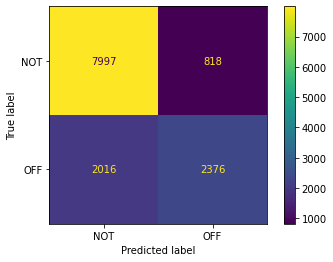

In [36]:
#@markdown Classification report e matriz de confusão

from sklearn.metrics import classification_report, plot_confusion_matrix
y_pred = modelo_subtask_a.predict(X)
print(classification_report(y, 
                            y_pred, 
                            target_names= 
                            binarizador_tarefa_a.classes_))
plot_confusion_matrix(modelo_subtask_a, 
                      X, 
                      y, 
                      display_labels= binarizador_tarefa_a.classes_,
                      values_format= ".0f")

,tweet,subtask_a
id,,
15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF
27014,constitutionday revere conservative hate progr...,NOT
30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT
13876,watch boomer get news parole make smile wentwo...,NOT
60133,nopasaran unity demo oppose far right london a...,NOT


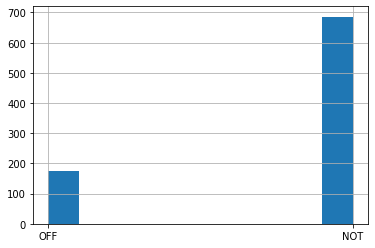

In [37]:
#@markdown Classificação dos tweets da subtask

y_pred = pd.Series(binarizador_tarefa_a.inverse_transform(modelo_subtask_a.predict(testset_a_aumentado)),name= 'subtask_a')
y_pred.index = testset_a_aumentado.index
resultado_subtask_a = pd.concat([testset_a_aumentado[['tweet']] , y_pred], axis=1)
resultado_subtask_a['subtask_a'].hist()
resultado_subtask_a.head(5)


In [41]:
#@markdown Salvar e realizar download do arquivo resultante
resultado_subtask_a.to_csv('testset-levela-classificado.csv',sep=' ')
print("Salvo em '/content/testset-levela-classificado.csv'!")
if 'COLAB_GPU' in os.environ:
  files.download('/content/testset-levela-classificado.csv')


Salvo em '/content/testset-levela-classificado.csv'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Avaliação do modelo final para subtask B


In [34]:
#@markdown Carregar modelo de classificação 

#@markdown modelos salvos estão localizados em '/content/Mineracao_dados_textos_web/modelos_salvos/'
from joblib import load
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
nome_modelo = "logistic_regression_1_subtask_a_f1_70.joblib" #@param {type:"string"}

caminho = '/content/Mineracao_dados_textos_web/modelos_salvos/'

modelo_subtask_b = load(caminho + nome_modelo)


X = trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1)
target='subtask_b'
binarizador_tarefa_b = LabelBinarizer()
y = binarizador_tarefa_b.fit_transform(trainset_aumentado[target].dropna())
y = pd.Series(np.ravel(y))

FileNotFoundError: ignored

In [ ]:
#@markdown Cross validation
num_folds = 10 #@param {type:"integer"}
from sklearn.model_selection import cross_validate

cross_validation_modelo_b = cross_validate(modelo_subtask_b, X, y, 
                        scoring= "f1_macro",
                        cv= StratifiedKFold(n_splits= num_folds, shuffle= True),
                        return_train_score= True)

scores_treino_modelo_b = cross_validation_modelo_b['train_score'].mean()

scores_teste_modelo_b = cross_validation_modelo_b['test_score'].mean()

print("Média do F1 score de treinamento: ", round(scores_treino_modelo_b,3))

print("Média do F1 score de teste: ", round(scores_teste_modelo_b,3))

In [ ]:
#@markdown Classification report e matriz de confusão

from sklearn.metrics import classification_report, plot_confusion_matrix
y_pred = modelo_subtask_b.predict(X)
print(classification_report(y, 
                            y_pred, 
                            target_names= 
                            binarizador_tarefa_b.classes_))
plot_confusion_matrix(modelo_subtask_b, 
                      X, 
                      y, 
                      display_labels= binarizador_tarefa_b.classes_,
                      values_format= ".0f")

,tweet,subtask_a
id,,
15923,whoisq wherestheserver dumpnike declasfisa dem...,OFF
27014,constitutionday revere conservative hate progr...,OFF
30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT
13876,watch boomer get news parole make smile wentwo...,NOT
60133,nopasaran unity demo oppose far right london a...,NOT


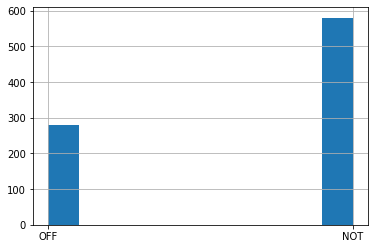

In [ ]:
#@markdown Classificação dos tweets da subtask

y_pred = pd.Series(binarizador_tarefa_b.inverse_transform(modelo_subtask_b.predict(testset_b_aumentado)),name= 'subtask_a')
y_pred.index = testset_b_aumentado.index
resultado_subtask_b = pd.concat([testset_b_aumentado[['tweet']] , y_pred], axis=1)
resultado_subtask_b['subtask_b'].hist()
resultado_subtask_b.head(5)


In [ ]:
#@markdown Salvar e realizar download do arquivo resultante
resultado_subtask_b.to_csv('testset-levelb-classificado.csv',sep=' ')
print("Salvo em '/content/testset-levelb-classificado.csv'!")
if 'COLAB_GPU' in os.environ:
  files.download('/content/testset-levelb-classificado.csv')